In [413]:
import pandas as pd
df = pd.read_csv('more_dropped_columns.csv')
print(df.shape[0])
df.head()

1779


,name,r-date,score,user score,genre,critics,users,price,dlc_count,achievements,genres,estimated_owners,average_playtime_forever,average_playtime_2weeks,total_steam_reviews,percent_positive_steam
0,Half-Life 2,"November 16, 2004",96,9.1,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",81,10773,9.99,1,33,['Action'],10000000 - 20000000,606,185,146055,0.974756
1,Grand Theft Auto V,"April 13, 2015",96,7.8,"Modern,Action Adventure,Open-World",57,6661,0.00,1,77,"['Action', 'Adventure']",20000000 - 50000000,13650,656,1381351,0.847863
2,Half-Life,"November 19, 1998",96,9.0,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",24,4321,9.99,1,0,['Action'],5000000 - 10000000,459,102,75965,0.965524
3,Portal 2,"April 18, 2011",95,9.1,"Action,Shooter,Shooter,First-Person,Sci-Fi,Sci...",52,7482,9.99,1,51,"['Action', 'Adventure']",10000000 - 20000000,874,118,301938,0.987951
4,The Elder Scrolls V: Skyrim,"November 10, 2011",94,8.3,"Role-Playing,First-Person,First-Person,Western...",32,11301,19.99,1,75,['RPG'],5000000 - 10000000,6458,596,309973,0.948270


In [414]:
#remove duplicates in the genre column
df['genres'] = df['genres'].str.replace(r"[\[\]']", "", regex=True)
df['genres'] = df['genres'].apply(lambda x: ','.join(sorted(set(x.split(',')), key=x.split(',').index)).replace(', ', ','))
df['genre'] = df['genre'].apply(lambda x: ','.join(sorted(set(x.split(',')), key=x.split(',').index)))
df.head()

,name,r-date,score,user score,genre,critics,users,price,dlc_count,achievements,genres,estimated_owners,average_playtime_forever,average_playtime_2weeks,total_steam_reviews,percent_positive_steam
0,Half-Life 2,"November 16, 2004",96,9.1,"Action,Shooter,First-Person,Sci-Fi,Arcade",81,10773,9.99,1,33,Action,10000000 - 20000000,606,185,146055,0.974756
1,Grand Theft Auto V,"April 13, 2015",96,7.8,"Modern,Action Adventure,Open-World",57,6661,0.00,1,77,"Action,Adventure",20000000 - 50000000,13650,656,1381351,0.847863
2,Half-Life,"November 19, 1998",96,9.0,"Action,Shooter,First-Person,Sci-Fi,Arcade",24,4321,9.99,1,0,Action,5000000 - 10000000,459,102,75965,0.965524
3,Portal 2,"April 18, 2011",95,9.1,"Action,Shooter,First-Person,Sci-Fi,Arcade",52,7482,9.99,1,51,"Action,Adventure",10000000 - 20000000,874,118,301938,0.987951
4,The Elder Scrolls V: Skyrim,"November 10, 2011",94,8.3,"Role-Playing,First-Person,Western-Style",32,11301,19.99,1,75,RPG,5000000 - 10000000,6458,596,309973,0.948270


In [415]:
def combine_genres(row):
    # Split each genre string into a list
    genres1 = row['genre'].split(',')
    genres2 = row['genres'].split(',')
    
    # Combine both lists and remove duplicates by converting to a set
    combined_genres = list(set(genres1 + genres2))
    
    # Join the combined list back into a string, with commas separating the genres
    return ','.join(combined_genres)

# Apply the function to each row and create a new column
df['Combined_Genres'] = df.apply(combine_genres, axis=1)

In [416]:
df['Combined_Genres'] = df['Combined_Genres'].apply(lambda x: ','.join(sorted(set(x.split(',')), key=x.split(',').index)))
df['Combined_Genres'] = df['Combined_Genres'].apply(lambda x: ','.join([genre for genre in x.split(',') if genre != 'General']))
df.head()

,name,r-date,score,user score,genre,critics,users,price,dlc_count,achievements,genres,estimated_owners,average_playtime_forever,average_playtime_2weeks,total_steam_reviews,percent_positive_steam,Combined_Genres
0,Half-Life 2,"November 16, 2004",96,9.1,"Action,Shooter,First-Person,Sci-Fi,Arcade",81,10773,9.99,1,33,Action,10000000 - 20000000,606,185,146055,0.974756,"Arcade,First-Person,Action,Sci-Fi,Shooter"
1,Grand Theft Auto V,"April 13, 2015",96,7.8,"Modern,Action Adventure,Open-World",57,6661,0.00,1,77,"Action,Adventure",20000000 - 50000000,13650,656,1381351,0.847863,"Action,Open-World,Adventure,Modern,Action Adve..."
2,Half-Life,"November 19, 1998",96,9.0,"Action,Shooter,First-Person,Sci-Fi,Arcade",24,4321,9.99,1,0,Action,5000000 - 10000000,459,102,75965,0.965524,"Arcade,First-Person,Action,Sci-Fi,Shooter"
3,Portal 2,"April 18, 2011",95,9.1,"Action,Shooter,First-Person,Sci-Fi,Arcade",52,7482,9.99,1,51,"Action,Adventure",10000000 - 20000000,874,118,301938,0.987951,"Arcade,First-Person,Action,Adventure,Sci-Fi,Sh..."
4,The Elder Scrolls V: Skyrim,"November 10, 2011",94,8.3,"Role-Playing,First-Person,Western-Style",32,11301,19.99,1,75,RPG,5000000 - 10000000,6458,596,309973,0.948270,"First-Person,RPG,Role-Playing,Western-Style"


In [417]:
print(df.shape[0])
df = df[~((df['price'] == 0) & ~df['Combined_Genres'].str.contains('Free to Play', case=False))]
print(df.shape[0])

1779
1716


In [418]:
# df_free_to_play = df[df['Combined_Genres'].str.contains('Free to Play', case=False)]
# df_free_to_play.head()

In [419]:
from collections import Counter
all_genres = [genre for sublist in df['Combined_Genres'].apply(lambda x: x.split(',')) for genre in sublist]

# Count the occurrences of each genre
genre_counts = Counter(all_genres)

# For example, to get how many times 'Action' appears:
print(genre_counts['Action'])

# If you want to see the counts for all genres:
print(genre_counts)

922
Counter({'Indie': 954, 'Action': 922, 'Adventure': 767, 'Strategy': 494, 'RPG': 372, 'Simulation': 268, 'Action Adventure': 258, 'Shooter': 232, 'First-Person': 230, 'Role-Playing': 195, 'Arcade': 186, 'Casual': 183, 'Real-Time': 177, 'Sci-Fi': 161, '2D': 140, 'Platformer': 138, '3D': 116, 'Turn-Based': 111, 'Fantasy': 102, 'Modern': 91, 'Third-Person': 89, 'Action RPG': 87, 'Miscellaneous': 85, 'Historic': 77, 'Point-and-Click': 75, 'Survival': 72, 'Puzzle': 72, 'Tactics': 67, 'Racing': 50, 'Tactical': 45, 'Sports': 44, 'Western-Style': 41, 'Open-World': 41, 'Combat': 40, 'Free to Play': 39, 'Management': 38, 'Horror': 37, "Shoot-'Em-Up": 35, 'Automobile': 33, 'Massively Multiplayer': 32, 'Linear': 30, 'Command': 27, 'Top-Down': 26, 'Driving': 23, 'Business / Tycoon': 23, 'Virtual': 21, "Beat-'Em-Up": 20, '4X': 18, 'Visual Novel': 18, 'Flight': 18, 'Japanese-Style': 16, 'Massively Multiplayer Online': 16, 'PC-style RPG': 16, 'Military': 16, 'Government': 16, 'Career': 15, 'Defense

In [420]:
from itertools import combinations

# Step 2: Identify genres that appear at least 20 times
min_count = 100  # Minimum threshold for genres to be considered
valid_genres = [genre for genre, count in genre_counts.items() if count >= min_count]

print(f"Genres with at least {min_count} occurrences:", valid_genres)

Genres with at least 100 occurrences: ['Arcade', 'First-Person', 'Action', 'Sci-Fi', 'Shooter', 'Adventure', 'RPG', 'Role-Playing', 'Real-Time', 'Strategy', 'Action Adventure', 'Indie', 'Fantasy', 'Simulation', '2D', 'Platformer', 'Casual', 'Turn-Based', '3D']


In [421]:
def filter_invalid_genres(entry, valid_genres):
    # Split the entry into genres, keep only valid ones, and join them back into a string
    return ','.join([genre for genre in entry.split(',') if genre in valid_genres])

df_valid = df.copy()
df_valid['Combined_Genres'] = df['Combined_Genres'].apply(lambda x: filter_invalid_genres(x, valid_genres))
#print(df_valid.shape[0], df.shape[0])

In [422]:
# Step 4: Generate genre pairs from the filtered DataFrame
genre_pairs = []
for genres in df_valid['Combined_Genres'].apply(lambda x: x.split(',')):
    # Only consider pairs where both genres are in the valid genres list
    valid_genre_pairs = [genre for genre in genres if genre in valid_genres]
    genre_pairs.extend(combinations(set(valid_genre_pairs), 2))  # Using set to avoid duplicates in one entry

# Step 5: Count co-occurrences of genre pairs
pair_counts = Counter(genre_pairs)

# Step 6: Initialize the overlap matrix as a float type DataFrame
overlap_matrix = pd.DataFrame(0.0, index=valid_genres, columns=valid_genres)  # Initialize with float

# Populate the overlap matrix
for (genre1, genre2), count in pair_counts.items():
    overlap = count / min(genre_counts[genre1], genre_counts[genre2])  # Calculate overlap
    overlap_matrix.loc[genre1, genre2] = float(overlap)  # Make sure it's cast to float
    overlap_matrix.loc[genre2, genre1] = float(overlap)  # Symmetric matrix

# Ensure the matrix is still of float type after assignments
overlap_matrix = overlap_matrix.astype(float)
# Step 7: Display the overlap matrix
#print("Overlap matrix (percentage of co-occurrence relative to genre frequencies):")
#print(overlap_matrix)

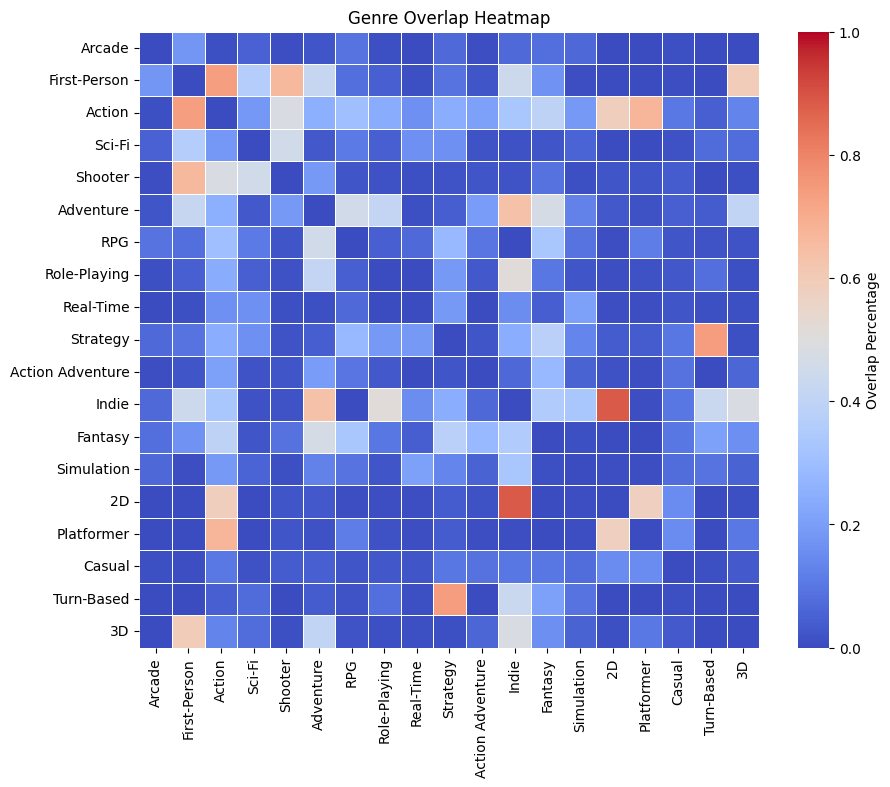

In [423]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(overlap_matrix, cmap="coolwarm", vmin = 0, vmax = 1, cbar_kws={'label': 'Overlap Percentage'}, linewidths=0.5)
plt.title('Genre Overlap Heatmap')
plt.show()

In [424]:
genres_to_remove = set()
threshold = 0.8
# Iterate through the overlap matrix to find pairs with overlap > 0.9
for genre1 in valid_genres:
    for genre2 in valid_genres:
        if genre1 != genre2 and overlap_matrix.loc[genre1, genre2] > threshold:
            # Remove the genre with the lower count
            if genre_counts[genre1] < genre_counts[genre2]:
                genres_to_remove.add(genre1)
            elif genre_counts[genre1] > genre_counts[genre2]:
                genres_to_remove.add(genre2)

# Remove the identified genres from the valid genres list
valid_genres = [genre for genre in valid_genres if genre not in genres_to_remove]

print(f"Genres to remove based on overlap > {threshold}: {genres_to_remove}")
print(f"Updated valid genres:", valid_genres)

Genres to remove based on overlap > 0.8: {'2D'}
Updated valid genres: ['Arcade', 'First-Person', 'Action', 'Sci-Fi', 'Shooter', 'Adventure', 'RPG', 'Role-Playing', 'Real-Time', 'Strategy', 'Action Adventure', 'Indie', 'Fantasy', 'Simulation', 'Platformer', 'Casual', 'Turn-Based', '3D']


In [425]:
#df_valid.head()

In [426]:
all_filtered_genres = [genre for sublist in df_valid['Combined_Genres'].apply(lambda x: x.split(',')) for genre in sublist]
genre_counts_filtered = Counter(all_filtered_genres)
print(genre_counts_filtered)

Counter({'Indie': 954, 'Action': 922, 'Adventure': 767, 'Strategy': 494, 'RPG': 372, 'Simulation': 268, 'Action Adventure': 258, 'Shooter': 232, 'First-Person': 230, 'Role-Playing': 195, 'Arcade': 186, 'Casual': 183, 'Real-Time': 177, 'Sci-Fi': 161, '2D': 140, 'Platformer': 138, '3D': 116, 'Turn-Based': 111, 'Fantasy': 102, '': 1})


In [427]:
num_valid_genres = len(valid_genres)
print(f"Number of valid genres: {num_valid_genres}")

Number of valid genres: 18


In [428]:
# df_valid['Combined_Genres'] = df_valid['Combined_Genres'].apply(lambda x: filter_invalid_genres(x, valid_genres))

# genre_pairs = []
# for genres in df_valid['Combined_Genres'].apply(lambda x: x.split(',')):
#     # Only consider pairs where both genres are in the valid genres list
#     valid_genre_pairs = [genre for genre in genres if genre in valid_genres]
#     genre_pairs.extend(combinations(set(valid_genre_pairs), 2))  # Using set to avoid duplicates in one entry

# # Step 5: Count co-occurrences of genre pairs
# pair_counts = Counter(genre_pairs)

# # Step 6: Initialize the overlap matrix as a float type DataFrame
# overlap_matrix = pd.DataFrame(0.0, index=valid_genres, columns=valid_genres)  # Initialize with float

# # Populate the overlap matrix
# for (genre1, genre2), count in pair_counts.items():
#     overlap = count / min(genre_counts[genre1], genre_counts[genre2])  # Calculate overlap
#     overlap_matrix.loc[genre1, genre2] = float(overlap)  # Make sure it's cast to float
#     overlap_matrix.loc[genre2, genre1] = float(overlap)  # Symmetric matrix

# # Ensure the matrix is still of float type after assignments
# overlap_matrix = overlap_matrix.astype(float)
# # Step 7: Display the overlap matrix
# #print("Overlap matrix (percentage of co-occurrence relative to genre frequencies):")
# # print(overlap_matrix)

In [429]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 8))
# sns.heatmap(overlap_matrix, vmin = 0, vmax = 1, cmap="coolwarm", cbar_kws={'label': 'Overlap Percentage'}, linewidths=0.5)
# plt.title('Genre Overlap Heatmap')
# plt.show()

In [430]:
df_valid = df_valid.drop(columns=['genre', 'genres', 'estimated_owners'])
df_valid = df_valid[df_valid['Combined_Genres'].str.strip() != '']
print(df_valid.shape[0])
df_valid['user score'] = df_valid['user score'] * 10

1715


In [431]:
df_valid.to_csv('combined_filtered_genres.csv', index=False)